## PyTorch Basics: A Beginner's Guide
This notebook will introduce the fundamentals of PyTorch, including Tensors, Autograd, and simple operations.

### Tensors

Think of Tensors as multi-dimensional arrays that can run on GPUs to accelerate numerical computations. 
Tensors are generalizations of vectors and matrices to potentially higher dimensions. They can be:

Tensors have several important characteristics:

- Shape: Defines the size of each dimension (like your example showing z.shape)
- Datatype: Specifies how the data is stored (e.g., torch.float32, torch.int64)
- Device: Where the tensor is stored (CPU or GPU)


Additionally, they efficiently represent multi-dimensional data (like images, video, or text), enable automatic differentiation for training neural networks and optimize performance through GPU acceleration. They're also aware of the  operations that have been performed on them, allowing for the construction of a computational graph. This graph is used by Autograd to compute gradients efficiently. 

In [ ]:
# Install PyTorch (if not already installed)
!pip install torch torchvision torchaudio

In [9]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
print("PyTorch version:", torch.__version__)

PyTorch version: 2.5.1


In [2]:
# From a list
tensor1 = torch.tensor([5, 6, 7])

# Random tensor
random_tensor = torch.rand(3, 3)

# Zeros and Ones tensors
zeros = torch.zeros(2, 2)
ones = torch.ones(2, 2)

# Identity Matrix
identity = torch.eye(3)

print("Random Tensor:\n", random_tensor)
print("Zeros:\n", zeros)
print("Identity Matrix:\n", identity)


Random Tensor:
 tensor([[0.6864, 0.8610, 0.9703],
        [0.2629, 0.4502, 0.6416],
        [0.2472, 0.7168, 0.9885]])
Zeros:
 tensor([[0., 0.],
        [0., 0.]])
Identity Matrix:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [3]:
# From a list
tensor1 = torch.tensor([5, 6, 7])

# Random tensor
random_tensor = torch.rand(3, 3)

# Zeros and Ones tensors
zeros = torch.zeros(2, 2)
ones = torch.ones(2, 2)

# Identity Matrix
identity = torch.eye(3)

print("Random Tensor:\n", random_tensor)
print("Zeros:\n", zeros)
print("Identity Matrix:\n", identity)


Random Tensor:
 tensor([[0.6166, 0.3610, 0.8693],
        [0.4352, 0.6273, 0.2401],
        [0.8127, 0.7218, 0.7519]])
Zeros:
 tensor([[0., 0.],
        [0., 0.]])
Identity Matrix:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [4]:
a = torch.tensor([2.0, 4.0, 6.0])
b = torch.tensor([1.0, 2.0, 3.0])

# Basic arithmetic
print("Addition:", a + b)
print("Multiplication:", a * b)
print("Matrix Multiplication:", a @ b.T)

# Reshaping tensors
matrix = torch.arange(1, 10).reshape(3, 3)
print("Reshaped Tensor:\n", matrix)


Addition: tensor([3., 6., 9.])
Multiplication: tensor([ 2.,  8., 18.])
Matrix Multiplication: tensor(28.)
Reshaped Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


/var/folders/dp/y1hx986s4j1fj9_kb72xl9q80000gn/T/ipykernel_67466/3653848728.py:7: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3687.)
  print("Matrix Multiplication:", a @ b.T)


In [5]:
# Requires Gradient
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2 + 2 * x + 1  # Function: f(x) = x^2 + 2x + 1

# Compute Gradient
y.backward()
print("Gradient (dy/dx):", x.grad)


Gradient (dy/dx): tensor(8.)


In [6]:
if torch.backends.mps.is_available():
    device = torch.device("mps")  # Metal Performance Shaders (Apple Silicon)
elif torch.cuda.is_available():
    device = torch.device("cuda")  # NVIDIA GPUs
else:
    device = torch.device("cpu")  # Fallback to CPU


print("Using device:", device)

# Move a tensor to the selected device
tensor_gpu = torch.tensor([1, 2, 3], dtype=torch.float32).to(device)
print("Tensor on device:", tensor_gpu)

Using device: mps
Tensor on device: tensor([1., 2., 3.], device='mps:0')


## Training a Linear Regression Model

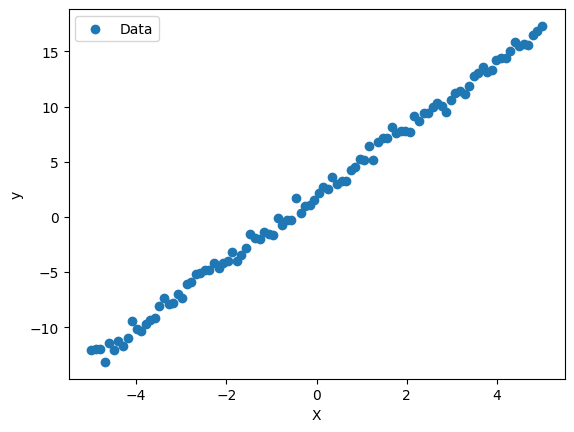

In [8]:
# Create random training data
torch.manual_seed(42) 
X = torch.linspace(-5, 5, 100).reshape(-1, 1)
y = 3 * X + 2 + torch.randn(X.shape) * 0.5  # Adding noise

# Move to device
X, y = X.to(device), y.to(device)

# Plot Data
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)  # y = Wx + b
    
    def forward(self, x):
        return self.linear(x)

# Initialize model and move to device
model = LinearRegressionModel().to(device)


In [11]:
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

Epoch 10/100, Loss: 8.5221
Epoch 20/100, Loss: 4.2277
Epoch 30/100, Loss: 2.8654
Epoch 40/100, Loss: 1.9921
Epoch 50/100, Loss: 1.4099
Epoch 60/100, Loss: 1.0213
Epoch 70/100, Loss: 0.7618
Epoch 80/100, Loss: 0.5886
Epoch 90/100, Loss: 0.4730
Epoch 100/100, Loss: 0.3958


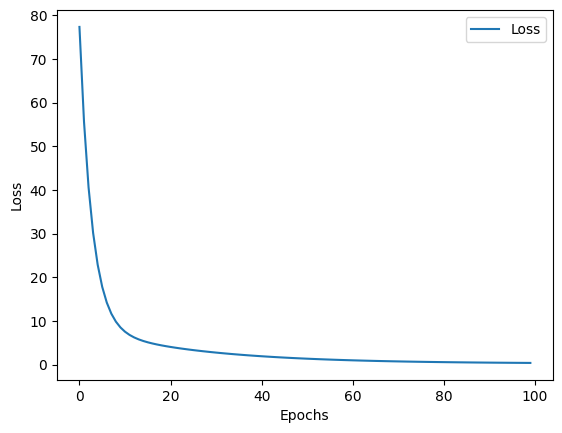

In [12]:
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()  # Sets model to training mode
    
    # Forward pass (Inferencing the model with the generated weights)
    predictions = model(X)
    # Computing the loss
    loss = criterion(predictions, y)
    
    # Backward pass
    optimizer.zero_grad() # Clears accumalated gradients. Gradients are accumulated for techniques like batch training.
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())


    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Complicating This a Bit Now, 
### Training a Neural Network

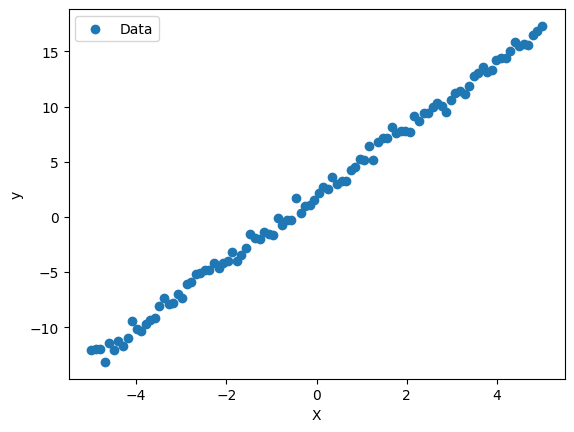

In [14]:
# Generate data: y = 3x + 2 with noise
torch.manual_seed(42)  
X = torch.linspace(-5, 5, 100).reshape(-1, 1)  # 100 data points
y = 3 * X + 2 + torch.randn(X.shape) * 0.5  # Add some noise

X, y = X.to(device), y.to(device)

# Plot Data
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [15]:
# Neural Network Model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer with 10 neurons
        self.relu = nn.ReLU()           # Activation function
        self.output = nn.Linear(10, 1)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

model = SimpleNN().to(device)
print(model)


SimpleNN(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)


SGD (Stochastic Gradient Descent) updates weights using the raw gradient of the loss function and typically requires careful tuning of the learning rate. It can include momentum to help accelerate convergence. 

On the other hand, Adam (Adaptive Moment Estimation) improves upon SGD by using **first-order momentum** (mean of past gradients) and **second-order momentum** (variance of past gradients) to adapt learning rates for each parameter individually. This makes Adam more effective in handling sparse gradients and converging faster in many cases, making it a preferred choice for deep learning tasks.


In [16]:
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer


Epoch 10/100, Loss: 60.5237
Epoch 20/100, Loss: 50.9244
Epoch 30/100, Loss: 43.8854
Epoch 40/100, Loss: 38.5560
Epoch 50/100, Loss: 32.3617
Epoch 60/100, Loss: 25.9562
Epoch 70/100, Loss: 19.7219
Epoch 80/100, Loss: 13.9858
Epoch 90/100, Loss: 9.2065
Epoch 100/100, Loss: 5.6288


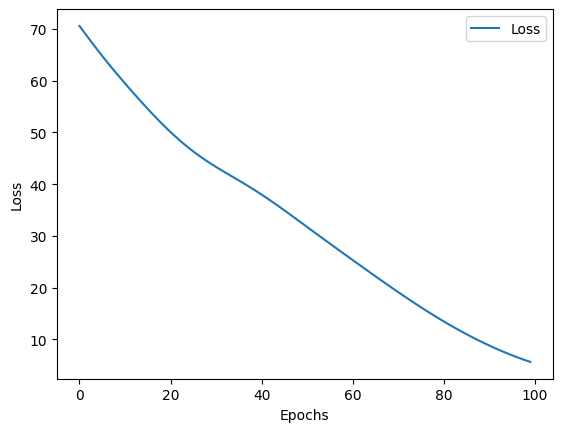

In [17]:
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass
    optimizer.zero_grad()  # Reset gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update model weights

    losses.append(loss.item())

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Plot loss curve
plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Dipping Toes Into The Encoder Decoder Territory

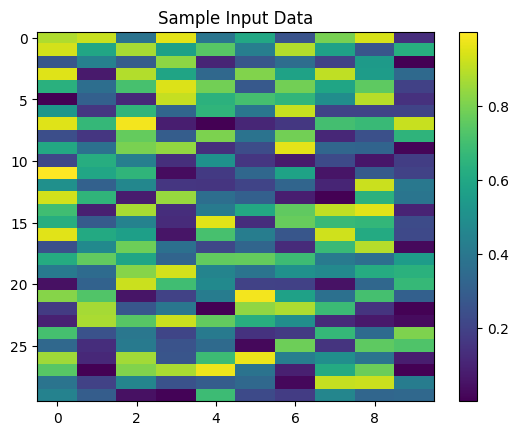

In [26]:
# Generate synthetic dataset (random numbers between 0 and 1)
torch.manual_seed(42)
X = torch.rand(500, 10)  # 500 samples, 10 features each

X = X.to(device)

# Plot some data samples
plt.imshow(X.cpu().numpy()[:30], cmap="viridis", aspect="auto")
plt.colorbar()
plt.title("Sample Input Data")
plt.show()


In [20]:
class EncoderDecoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super().__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize model
input_dim = 10
hidden_dim = 6
latent_dim = 3  # Compressed representation
model = EncoderDecoder(input_dim, hidden_dim, latent_dim).to(device)

print(model)


EncoderDecoder(
  (encoder): Sequential(
    (0): Linear(in_features=10, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=3, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=10, bias=True)
    (3): Sigmoid()
  )
)


In [21]:
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.01)  

Epoch 10/100, Loss: 0.0833
Epoch 20/100, Loss: 0.0785
Epoch 30/100, Loss: 0.0729
Epoch 40/100, Loss: 0.0697
Epoch 50/100, Loss: 0.0663
Epoch 60/100, Loss: 0.0650
Epoch 70/100, Loss: 0.0644
Epoch 80/100, Loss: 0.0642
Epoch 90/100, Loss: 0.0640
Epoch 100/100, Loss: 0.0639


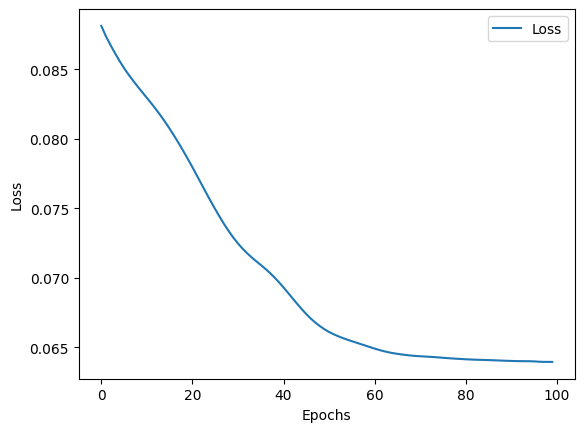

In [22]:
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()  # Set model to training mode

    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, X)  # Compare reconstructed X with original X

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Plot loss curve
plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


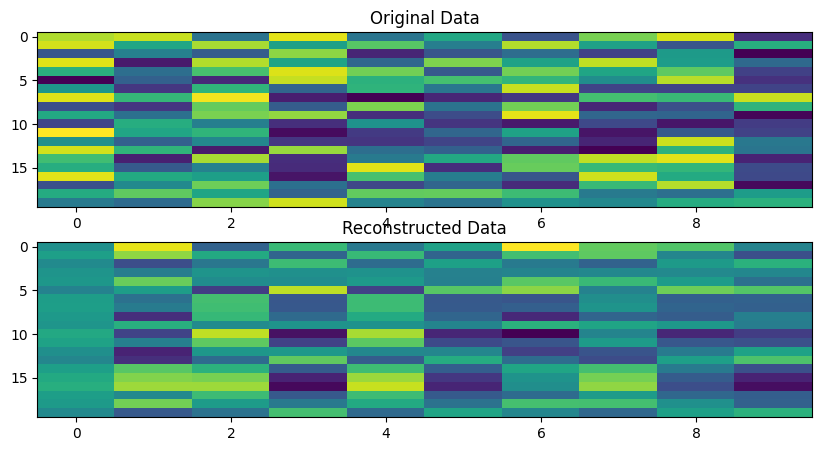

In [27]:
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    reconstructed = model(X)

# Plot original vs. reconstructed data for first 10 samples
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Original Data
axes[0].imshow(X.cpu().numpy()[:20], cmap="viridis", aspect="auto")
axes[0].set_title("Original Data")

# Reconstructed Data
axes[1].imshow(reconstructed.cpu().numpy()[:20], cmap="viridis", aspect="auto")
axes[1].set_title("Reconstructed Data")

plt.show()


## Promise This Isn't Scary

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class MaskedSelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super().__init__()
        # This is generally a vectorized representation of your input
        self.embed_size = embed_size
        # The number of attention heads you want your attention module to have. 
        self.heads = heads
        self.head_dim = embed_size // heads
        
        assert (
            self.head_dim * heads == embed_size
        ), "Embedding size needs to be divisible by heads"
        
        # These are Linear Weighted Multiplications for Input X with their W_q, W_k, W_v matrices.
        self.values = nn.Linear(embed_size, embed_size, bias=False)
        self.keys = nn.Linear(embed_size, embed_size, bias=False)
        self.queries = nn.Linear(embed_size, embed_size, bias=False)
        # We need some sort of an output (probabilty distribution/logits/anything meaninful from the hidden representation)
        self.fc_out = nn.Linear(embed_size, embed_size)
    # This function goes through the forward pass of the decoder-only transformer modul - we need a masked representation for our input.
    def forward(self, x, mask):
        N, seq_length, embed_size = x.shape
        
        values = self.values(x).view(N, seq_length, self.heads, self.head_dim)
        keys = self.keys(x).view(N, seq_length, self.heads, self.head_dim)
        queries = self.queries(x).view(N, seq_length, self.heads, self.head_dim)

        print("N, seq_length, self.heads, self.head_dim : ",values.shape)
        
        # Nothing fancy just transposing so that the multiplication happens in batches of attention head sizes
        values = values.transpose(1, 2)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        print("N, self.heads, seq_length, self.head_dim: ",values.shape)

        
        energy = torch.matmul(queries, keys.transpose(-2, -1)) / math.sqrt(self.head_dim)
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))
        
        attention = torch.softmax(energy, dim=-1)
        # Other complicated transposing just to get the attention formula to work.
        out = torch.matmul(attention, values).transpose(1, 2).contiguous().view(N, seq_length, embed_size)
        return self.fc_out(out)

class MiniTransformer(nn.Module):
    def __init__(self, embed_size, heads, forward_expansion, dropout):
        super().__init__()
        self.attention = MaskedSelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)
        
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_size, forward_expansion * embed_size),
            nn.ReLU(),
            nn.Linear(forward_expansion * embed_size, embed_size)
        )
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        attention = self.attention(x, mask)
        x = self.norm1(attention + x)
        forward = self.feed_forward(x)
        x = self.norm2(forward + x)
        return self.dropout(x)


# This gives a positional encoding to your tokens such that the transformer has some positional knowledge of your inputs.
class PositionalEncoding(nn.Module):
    def __init__(self, embed_size, max_length=100):
        super().__init__()
        self.encoding = torch.zeros(max_length, embed_size)
        position = torch.arange(0, max_length).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_size, 2) * (-math.log(10000.0) / embed_size))

        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        return x + self.encoding[:, :x.size(1), :].to(x.device)

class TransformerDecoder(nn.Module):
    def __init__(self, vocab_size, embed_size, num_layers, heads, forward_expansion, dropout, max_length):
        super().__init__()
        self.embed_size = embed_size
        self.word_embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = PositionalEncoding(embed_size, max_length)
        self.layers = nn.ModuleList(
            [MiniTransformer(embed_size, heads, forward_expansion, dropout) for _ in range(num_layers)]
        )
        self.fc_out = nn.Linear(embed_size, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        x = self.dropout(self.positional_encoding(self.word_embedding(x)))
        for layer in self.layers:
            x = layer(x, mask)
        return self.fc_out(x)

# Hyperparameters
vocab_size = 5000   # Toy vocabulary size
embed_size = 128    # Embedding size
num_layers = 3      # Number of decoder layers
heads = 4           # Multi-head attention heads
forward_expansion = 4
dropout = 0.1
max_length = 50     # Max sequence length


model = TransformerDecoder(vocab_size, embed_size, num_layers, heads, forward_expansion, dropout, max_length)
print(model)


sample_input = torch.randint(0, vocab_size, (1, 10))  # (batch_size=1, sequence_length=10)
mask = torch.tril(torch.ones(10, 10)).unsqueeze(0).unsqueeze(0)  # Causal mask

# Forward Pass
output = model(sample_input, mask)
print(output.shape)  # Should output: (batch_size, seq_length, vocab_size)


TransformerDecoder(
  (word_embedding): Embedding(5000, 128)
  (positional_encoding): PositionalEncoding()
  (layers): ModuleList(
    (0-2): 3 x MiniTransformer(
      (attention): MaskedSelfAttention(
        (values): Linear(in_features=128, out_features=128, bias=False)
        (keys): Linear(in_features=128, out_features=128, bias=False)
        (queries): Linear(in_features=128, out_features=128, bias=False)
        (fc_out): Linear(in_features=128, out_features=128, bias=True)
      )
      (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (feed_forward): Sequential(
        (0): Linear(in_features=128, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=128, bias=True)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (fc_out): Linear(in_features=128, out_features=5000, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)
N, 